In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, cross_validate


In [14]:
# Dataset columns

columns = ['S1', 'C1', 'S2', 'C2', 'S3', 'C3', 'S4', 'C4', 'S5', 'C5', 'Class']

# Load your dataset
training_data = pd.read_csv('poker-hand-training-true.csv', header=None, names=columns)
testing_data = pd.read_csv('poker-hand-testing.csv', header=None, names=columns)

# Adjust the ranks of cards, specifically changing Ace from 1 to 14
def adjust_ranks(data):
    for i in range(1, 6):  # For each card in the hand
        data[f'C{i}'] = data[f'C{i}'].apply(lambda x: 14 if x == 1 else x)
    return data

# One-hot encode the suits of the cards
def one_hot_encode_suits(data):
    for i in range(1, 6):  # For each card in the hand
        data = pd.concat([data, pd.get_dummies(data[f'S{i}'], prefix=f'S{i}')], axis=1).drop([f'S{i}'], axis=1)
    return data

# Make all rows with classes 0-3 to be 0, 4-6 to be 1, and 7-9 to be 2
def adjust_classes(data):
    data['Class'] = data['Class'].apply(lambda x: 0 if x < 4 else 1 if x < 7 else 2)
    return data

# Apply preprocessing steps
def preprocess_data(data):
    data = adjust_ranks(data)
    data = one_hot_encode_suits(data)
    data = adjust_classes(data)
    return data

training_data_preprocessed = preprocess_data(training_data)
testing_data_preprocessed = preprocess_data(testing_data)

# Split training and test data to just have the combinations where classes are 0,1 0,2 and 1,2
training_data_preprocessed_01 = training_data_preprocessed[training_data_preprocessed['Class'] != 2]
testing_data_preprocessed_01 = testing_data_preprocessed[testing_data_preprocessed['Class'] != 2]

training_data_preprocessed_02 = training_data_preprocessed[training_data_preprocessed['Class'] != 1]
testing_data_preprocessed_02 = testing_data_preprocessed[testing_data_preprocessed['Class'] != 1]

training_data_preprocessed_12 = training_data_preprocessed[training_data_preprocessed['Class'] != 0]
testing_data_preprocessed_12 = testing_data_preprocessed[testing_data_preprocessed['Class'] != 0]

#Final Preprocessed DATA
print(training_data_preprocessed.head())
print(testing_data_preprocessed.head())

   C1  C2  C3  C4  C5  Class   S1_1   S1_2   S1_3   S1_4  ...   S3_3   S3_4  \
0  10  11  13  12  14      2   True  False  False  False  ...  False  False   
1  11  13  10  12  14      2  False   True  False  False  ...  False  False   
2  12  11  13  10  14      2  False  False   True  False  ...   True  False   
3  10  11  14  13  12      2  False  False  False   True  ...  False   True   
4  14  13  12  11  10      2  False  False  False   True  ...  False   True   

    S4_1   S4_2   S4_3   S4_4   S5_1   S5_2   S5_3   S5_4  
0   True  False  False  False   True  False  False  False  
1  False   True  False  False  False   True  False  False  
2  False  False   True  False  False  False   True  False  
3  False  False  False   True  False  False  False   True  
4  False  False  False   True  False  False  False   True  

[5 rows x 26 columns]
   C1  C2  C3  C4  C5  Class   S1_1   S1_2   S1_3   S1_4  ...   S3_3   S3_4  \
0  14  13   4   3  12      0   True  False  False  False  ...  

k=4: 0.9926382315278582
k=5: 0.9925982235262578
k=6: 0.9926782475342607
k=7: 0.9926782475342607
k=8: 0.9926782475342607
k=9: 0.9926782475342607


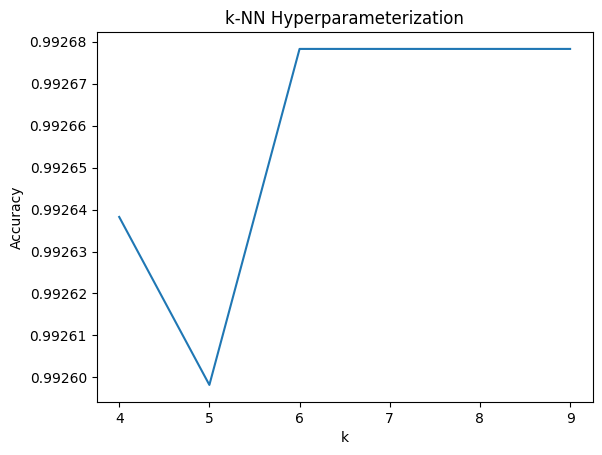

Best k: 6


In [15]:
# perform 5-fold cross validation on the training dataset on the binary classification problem of class 0 versus 1
k_values = range(4, 10)
cross_val_scores = []
training_data_x = training_data_preprocessed_01.drop('Class', axis=1)
for k in k_values:
    knn_hyperparameterization = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_hyperparameterization, training_data_x, training_data_preprocessed_01['Class'], cv=5, scoring='accuracy')
    cross_val_scores.append(scores.mean())

for i in range(len(k_values)):
    print(f'k={k_values[i]}: {cross_val_scores[i]}')

plt.plot(k_values, cross_val_scores)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('k-NN Hyperparameterization')
plt.show()
print(f'Best k: {k_values[np.argmax(cross_val_scores)]}')


In [16]:
# train the model on the training dataset with the best k value and evaluate it on the test dataset in the following cell
best_k = k_values[np.argmax(cross_val_scores)]
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(training_data_preprocessed_01.drop('Class', axis=1), training_data_preprocessed_01['Class'])

knn_score = knn.score(training_data_preprocessed_01.drop('Class', axis=1), training_data_preprocessed_01['Class'])
print(f'Accuracy on training data for class 0 versus 1: {knn_score}')

Accuracy on training data for class 0 versus 1: 0.9926782427782668


In [17]:
knn_score = knn.score(testing_data_preprocessed_01.drop('Class', axis=1), testing_data_preprocessed_01['Class'])
print(f'Accuracy on test data for class 0 versus 1: {knn_score}')

Accuracy on test data for class 0 versus 1: 0.9926842076308695


k=4: 0.999355545199806
k=5: 0.999355545199806
k=6: 0.999355545199806
k=7: 0.999355545199806
k=8: 0.999355545199806
k=9: 0.999355545199806


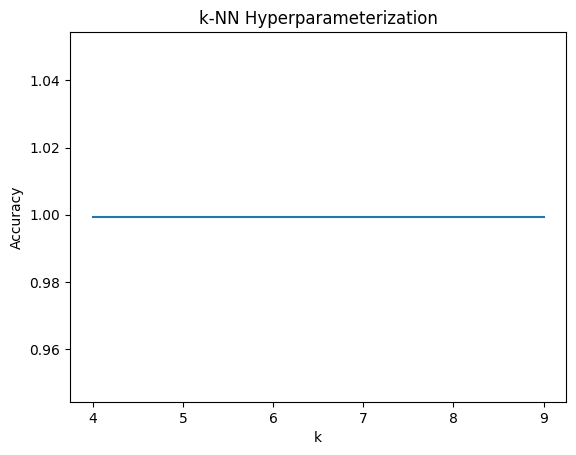

Best k: 4


In [18]:
# perform 5-fold cross validation on the training dataset on the binary classification problem of class 0 versus 2
k_values = range(4, 10)
cross_val_scores = []
training_data_x = training_data_preprocessed_02.drop('Class', axis=1)
for k in k_values:
    knn_hyperparameterization = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_hyperparameterization, training_data_x, training_data_preprocessed_02['Class'], cv=5, scoring='accuracy')
    cross_val_scores.append(scores.mean())

for i in range(len(k_values)):
    print(f'k={k_values[i]}: {cross_val_scores[i]}')

plt.plot(k_values, cross_val_scores)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('k-NN Hyperparameterization')
plt.show()
print(f'Best k: {k_values[np.argmax(cross_val_scores)]}')


In [19]:
# train the model on the training dataset with the best k value and evaluate it on the test dataset
best_k = k_values[np.argmax(cross_val_scores)]
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(training_data_preprocessed_02.drop('Class', axis=1), training_data_preprocessed_02['Class'])
knn_score = knn.score(training_data_preprocessed_02.drop('Class', axis=1), training_data_preprocessed_02['Class'])
print(f'Accuracy on training data for class 0 versus 2: {knn_score}')


Accuracy on training data for class 0 versus 2: 0.9926782427782668


In [20]:
knn_score = knn.score(testing_data_preprocessed_02.drop('Class', axis=1), testing_data_preprocessed_02['Class'])
print(f'Accuracy on test data for class 0 versus 2: {knn_score}')

Accuracy on test data for class 0 versus 2: 0.9997511823873395


k=4: 0.9094871794871795
k=5: 0.9094871794871795
k=6: 0.9146153846153846
k=7: 0.9146153846153846
k=8: 0.9196153846153846
k=9: 0.9146153846153846


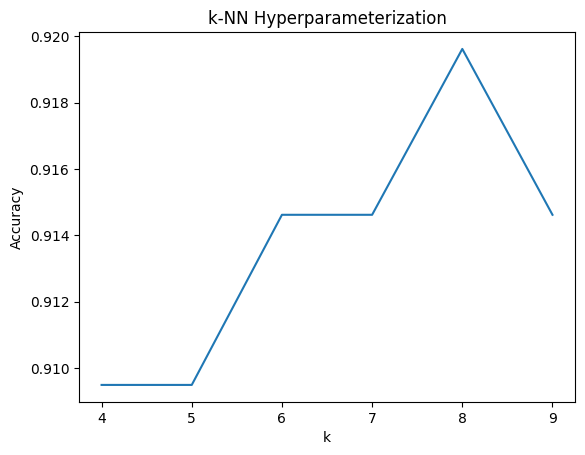

Best k: 8


In [21]:
# perform 5-fold cross validation on the training dataset on the binary classification problem of class 1 versus 2
k_values = range(4, 10)
cross_val_scores = []
training_data_x = training_data_preprocessed_12.drop('Class', axis=1)
for k in k_values:
    knn_hyperparameterization = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_hyperparameterization, training_data_x, training_data_preprocessed_12['Class'], cv=5, scoring='accuracy')
    cross_val_scores.append(scores.mean())

for i in range(len(k_values)):
    print(f'k={k_values[i]}: {cross_val_scores[i]}')

plt.plot(k_values, cross_val_scores)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('k-NN Hyperparameterization')
plt.show()
print(f'Best k: {k_values[np.argmax(cross_val_scores)]}')


In [22]:
# train the model on the training dataset with the best k value and evaluate it on the test dataset
best_k = k_values[np.argmax(cross_val_scores)]
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(training_data_preprocessed_12.drop('Class', axis=1), training_data_preprocessed_12['Class'])
knn_score = knn.score(testing_data_preprocessed_12.drop('Class', axis=1), testing_data_preprocessed_12['Class'])
print(f'Accuracy on test data for class 1 versus 2: {knn_score}')


Accuracy on test data for class 1 versus 2: 0.9668874172185431


In [23]:
knn_score = knn.score(testing_data_preprocessed_12.drop('Class', axis=1), testing_data_preprocessed_12['Class'])
print(f'Accuracy on test data for class 1 versus 2: {knn_score}')

Accuracy on test data for class 1 versus 2: 0.9668874172185431
